In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
plt.rcParams['font.family']='batang'

In [15]:
전기생산단가 = pd.read_csv('전기생산단가.csv',encoding='cp949')
판매단가 = pd.read_csv('전기판매단가.csv')
판매수입 = pd.read_csv('2018~2022 전기 판매 수입.csv')
지역전력발전 = pd.read_excel('2018~2021 지역별 발전량.xlsx')

In [16]:
pd.options.display.float_format = '{:.5f}'.format

In [17]:
지역전력발전['합계'] = 지역전력발전.sum(axis = 1)
전력발전=지역전력발전[['연도','합계']]
전력발전.합계 = 전력발전.합계* 1000
전력발전.columns=('기간','발전전력량')
전력발전.sort_values(by=['기간'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_47028\3265190311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  전력발전.합계 = 전력발전.합계* 1000
C:\Users\user\AppData\Local\Temp\ipykernel_47028\3265190311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  전력발전.sort_values(by=['기간'],inplace=True)


In [18]:
afsd=pd.DataFrame(
    {
    '기간':[2022],
    '발전전력량':[np.nan]
    }
)
전력발전=pd.concat([전력발전,afsd],ignore_index=True)

In [31]:
전력발전

,기간,발전전력량
0,2018,570648524617.55286
1,2019,563042323793.87610
2,2020,552164179000.00000
3,2021,576811509364.99988
4,2022,NaN


In [19]:
전기생산단가1 = 전기생산단가.loc[2:6,:]
전기생산단가2 = 전기생산단가1.drop(전기생산단가1.iloc[:,1:18],axis=1)
전기생산단가3 = 전기생산단가2.loc[1:, :]
전기생산단가 = pd.DataFrame(전기생산단가3)
전기생산단가 = 전기생산단가.astype(int)
전기생산단가.sort_values(by=['기간'],inplace=True)
전기생산단가.columns=('기간','단가평균')
전기생산단가

,기간,단가평균
6,2018,90
5,2019,89
4,2020,80
3,2021,95
2,2022,153


In [20]:
판매단가 = 판매단가.astype(int)
판매단가.sort_values(by=['기간'],inplace=True)
판매단가

,기간,평균금액
4,2018,108
3,2019,108
2,2020,109
1,2021,108
0,2022,120


In [21]:
판매수입2 = 판매수입.loc[:,['2018','2019','2020','2021','2022']]
판매수입3 = 판매수입2.loc[2,:]
판매수입=pd.DataFrame(판매수입3)
판매수입.reset_index(inplace=True)
판매수입.columns=(['기간','금액'])
판매수입=판매수입.astype('int64')
판매수입.금액 = 판매수입.금액 * 1000
판매수입.sort_values(by=['기간'],inplace=True)
판매수입

,기간,금액
0,2018,57217586406000
1,2019,56556500292000
2,2020,55918578210000
3,2021,57671487528000
4,2022,66030084285000


In [22]:
total = pd.merge(전력발전, 전기생산단가, on='기간', how='left')
total['발전비용'] = total['발전전력량'] * total['단가평균']
total

,기간,발전전력량,단가평균,발전비용
0,2018,570648524617.55286,90,51358367215579.75781
1,2019,563042323793.87610,89,50110766817654.97656
2,2020,552164179000.00000,80,44173134320000.00000
3,2021,576811509364.99988,95,54797093389674.99219
4,2022,NaN,153,NaN


In [25]:
발전비용 = pd.DataFrame(전력발전.발전전력량*total.단가평균)
발전비용.columns=(['발전비용'])
발전비용.insert(0,'기간',['2018','2019','2020','2021','2022'])
발전비용 = 발전비용.iloc[0:4,:]
발전비용

,기간,발전비용
0,2018,51358367215579.75781
1,2019,50110766817654.97656
2,2020,44173134320000.00000
3,2021,54797093389674.99219


In [26]:
차익 = pd.DataFrame(판매수입.금액-발전비용.발전비용)
차익.columns=(['손해금액'])
차익.insert(0,'기간',['2018','2019','2020','2021','2022'])
차익 = 차익.iloc[0:4,:]
차익


,기간,손해금액
0,2018,5859219190420.24219
1,2019,6445733474345.02344
2,2020,11745443890000.00000
3,2021,2874394138325.00781


In [32]:
판매수입['금액'] = 판매수입['금액'].astype('int64')
차익['손해금액'] = 차익['손해금액'].astype('int64')
차익['기간'] = 차익['기간'].astype('int64')

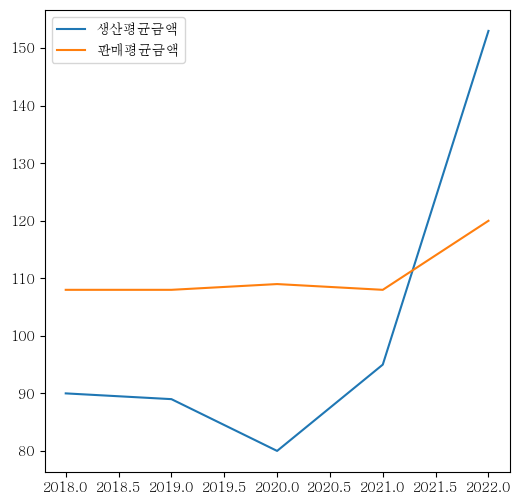

In [33]:
plt.figure(figsize=(6,6))
plt.plot(전기생산단가['기간'],전기생산단가['단가평균'],alpha= 1,label='생산평균금액')
plt.plot(판매단가['기간'],판매단가['평균금액'],alpha= 1,label='판매평균금액')
plt.legend()
plt.show()

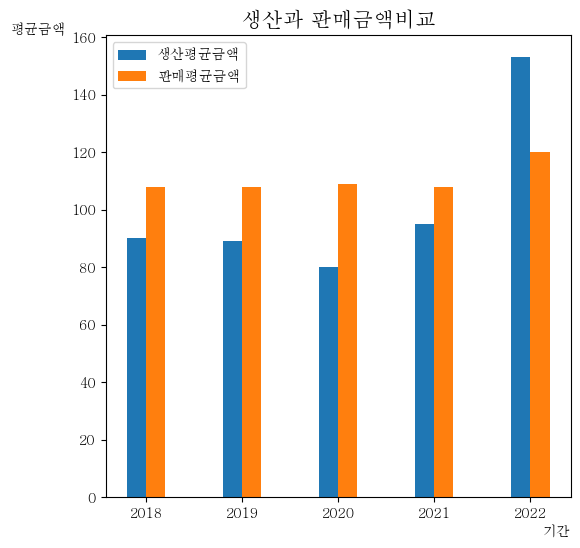

In [34]:
plt.figure(figsize=(6, 6))
plt.bar(전기생산단가['기간']-0.1, 전기생산단가['단가평균'], alpha=1, label='생산평균금액', width=0.2)
plt.bar(판매단가['기간']+0.1, 판매단가['평균금액'], alpha=1, label='판매평균금액', width= 0.2)
plt.legend()
plt.xlabel('기간',loc='right')
plt.ylabel('평균금액', fontsize=10, rotation=0,loc='top')
plt.title('생산과 판매금액비교',fontsize=15)
plt.show()

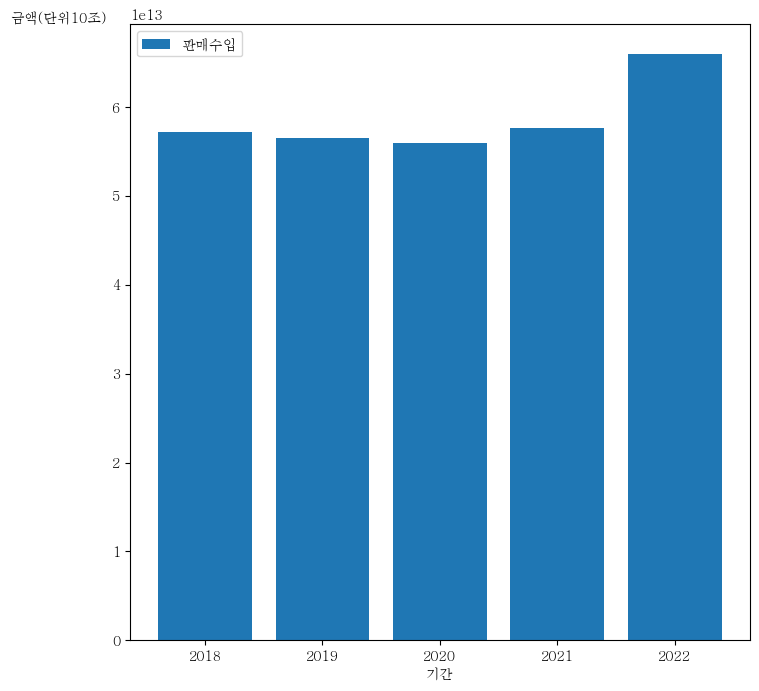

In [33]:
plt.figure(figsize=(8, 8))
plt.bar(판매수입['기간'], 판매수입['금액'], alpha=1, label='판매수입')
plt.legend()
plt.xlabel('기간')
plt.ylabel('금액(단위10조)', fontsize=10, rotation=0, loc='top')
plt.show()

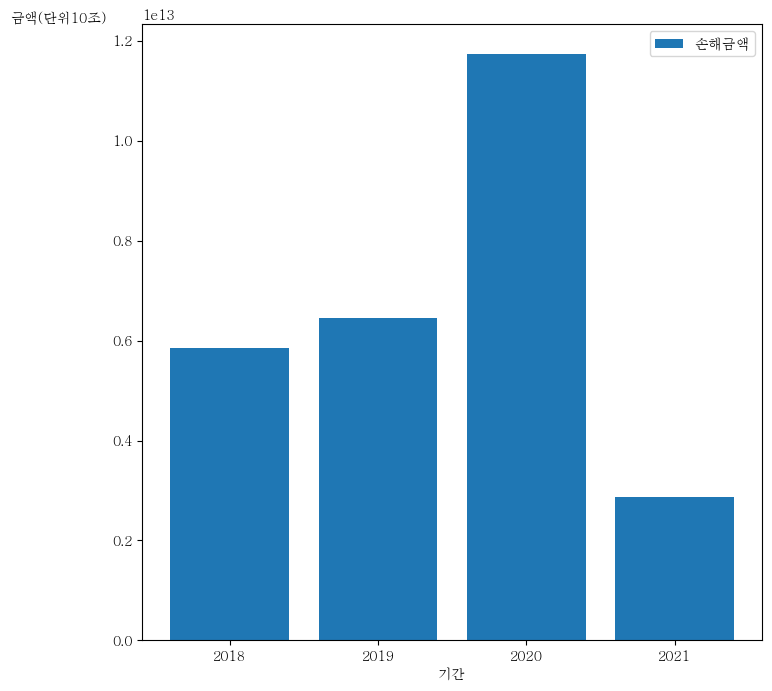

In [34]:
plt.figure(figsize=(8, 8))
plt.bar(차익['기간'],차익['손해금액'], alpha=1, label='손해금액')
plt.legend()
plt.xlabel('기간')
plt.ylabel('금액(단위10조)', fontsize=10, rotation=0, loc='top')
plt.show()

In [37]:
판매수입['금액'] = 판매수입['금액'].astype('int64')
차익['손해금액'] = 차익['손해금액'].astype('int64')
차익['기간'] = 차익['기간'].astype('int64')

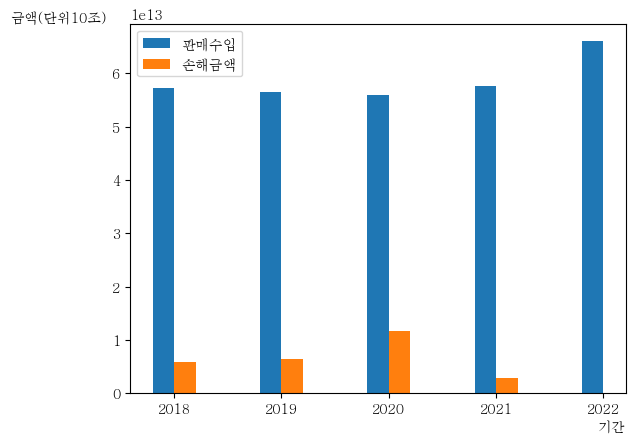

In [38]:
plt.bar(판매수입['기간'] - 0.1, 판매수입['금액'], alpha=1, label='판매수입', width=0.2)
plt.bar(차익['기간'] + 0.1, 차익['손해금액'], alpha=1, label='손해금액', width=0.2)
plt.legend()
plt.xlabel('기간')
plt.ylabel('금액(단위10조)', fontsize=10, rotation=0, loc='top')
plt.xlabel('기간', loc='right')
plt.show()